### TREE ###

- Data Structure used for Hirarchial data.
- **Root** node is the node with no parent node.
- **Leaf** node is the node with no child.


In [24]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.parent = None

    def add_child(self, child):
        child.parent = self
        self.children.append(child)

    def get_level(self):
        # level can be equal to no. of ancestors
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level

    def print_tree(self):
        print("    "*self.get_level() + "|__" + self.data)
        if self.children:
            for child in self.children:
                child.print_tree()


In [25]:
def build_product_tree():
    root = TreeNode("Electronics")

    Laptop = TreeNode("Laptop")
    Laptop.add_child(TreeNode("Mackbook"))
    Laptop.add_child(TreeNode("HP Omen"))
    Laptop.add_child(TreeNode("Microsoft book"))

    SmartPhone = TreeNode("SmartPhone")
    SmartPhone.add_child(TreeNode("Iphone 14"))
    SmartPhone.add_child(TreeNode("Moto Edge 40"))
    SmartPhone.add_child(TreeNode("Pixel 7A"))

    Tablet = TreeNode("Tablet")
    Tablet.add_child(TreeNode("Ipad"))
    Tablet.add_child(TreeNode("Xiaomi pad6"))
    Tablet.add_child(TreeNode("Samsung tab9"))

    root.add_child(Laptop)
    root.add_child(SmartPhone)
    root.add_child(Tablet)

    return root


In [26]:
product_tree = build_product_tree()
product_tree.print_tree()

|__Electronics
    |__Laptop
        |__Mackbook
        |__HP Omen
        |__Microsoft book
    |__SmartPhone
        |__Iphone 14
        |__Moto Edge 40
        |__Pixel 7A
    |__Tablet
        |__Ipad
        |__Xiaomi pad6
        |__Samsung tab9


**Binary Tree**

- Every node has atmost 2 child nodes.
- To implement Set you can use binary search tree.

**Binary Search Tree**

- Special case of Binary Tree, with special order of nodes
- All right hand nodes are greater than their parent node and lrft hand nodes are smaller.
- Search complexity is O(logn)
- Node insertion complexity is O(logn)

    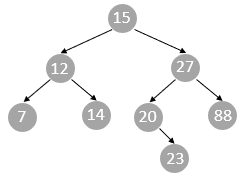
- Traversal
    - Breadt First Search
    - Depth First Search
        - In Order Traversal [7,12,14,15,20,23,27,88]
        - Pre Order Traversal [15,12,7,14,27,20,23,88]
        - Post Order Traversal [7,14,12,23,20,88,27,15]
- In Order Traversal sort the array.

In [116]:
class BinarySearchTreeNode:
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None

    def add_child(self, data):
        if self.data == data: # binary search tree do not have duplicate value
            return
        
        if data < self.data:
            # add data in left subtree

            if self.left: # already a left child node present
                self.left.add_child(data) # recursive call to add child
            else: # no node present -> add this node
                self.left = BinarySearchTreeNode(data)
        else:
            # add data to right subtree 

            if self.right: # already a right child node present
                self.right.add_child(data) # recursive call to add child
            else: # no node present -> add this node
                self.right = BinarySearchTreeNode(data)

    def in_order_traversal(self): 
        elements = []

        # visit left tree
        if self.left:
            elements += self.left.in_order_traversal()

        # visit base node
        elements.append(self.data)

        # visit right tree
        if self.right:
            elements += self.right.in_order_traversal()

        return elements
    
    def pre_order_traversal(self):
        elements = [self.data]

        if self.left:
            elements += self.left.pre_order_traversal()

        if self.right:
            elements += self.right.pre_order_traversal()
        
        return elements
    
    def post_order_traversal(self):
        elements = []
        
        if self.left:
            elements += self.left.post_order_traversal()

        # visit right tree
        if self.right:
            elements += self.right.post_order_traversal()

        elements.append(self.data)

        return elements
    
    def search(self, value): # O(logn) search complexity
        
        if self.data == value:
            return True
        
        if value < self.data:
            # value might be in left sub tree
            if self.left:
                return self.left.search(value)
            else:
                return False

        if value > self.data:
            # value might be in right sub tree
            if self.right:
                return self.right.search(value)
            else:
                return False
        
    def find_min(self):
        if self.left == None:
            return self.data
        if self.left:
            return self.left.find_min()
        
    def find_max(self):
        if self.right == None:
            return self.data
        if self.right:
            return self.right.find_max()

    def sum(self):
        left_sum = 0
        right_sum = 0
        if self.left:
            left_sum = self.left.sum()
        else:
            left_sum = 0
        
        if self.right:
            right_sum = self.right.sum()
        else:
            right_sum = 0
        return self.data + left_sum + right_sum
        
    def delete(self, value):
        if value < self.data:
            if self.left:
                self.left = self.left.delete(value)
        elif value > self.data:
            if self.right:
                self.right = self.right.delete(value)
        else:
            if self.left == None and self.right == None:
                return None
            if self.left is None:
                return self.right
            if self.right is None:
                return self.left
            
            min_val = self.right.find_min()
            self.data = min_val
            self.right = self.right.delete(min_val)
        return self

            


In [117]:
def build_binary_tree(array):
    root = BinarySearchTreeNode(array[0])

    for i in range(1, len(array)):
        root.add_child(array[i])

    return root

bst = build_binary_tree([17, 4, 1, 20, 9, 23, 18, 34])

In [118]:
print(bst.in_order_traversal()) # in order traversal sort the array
print(bst.pre_order_traversal()) 
print(bst.post_order_traversal()) 

[1, 4, 9, 17, 18, 20, 23, 34]
[17, 4, 1, 9, 20, 18, 23, 34]
[1, 9, 4, 18, 34, 23, 20, 17]


In [119]:
bst2 = build_binary_tree([17, 4, 1, 4, 20, 9, 9, 23, 23, 18, 34]) # do not allow same element -> implement SET
print(bst.in_order_traversal())

[1, 4, 9, 17, 18, 20, 23, 34]


In [120]:
bst.search(9) 

True

In [121]:
bst.find_min()

1

In [122]:
bst.find_max()

34

In [123]:
bst.sum()

126

In [124]:
bst.delete(23)
print(bst.in_order_traversal())

[1, 4, 9, 17, 18, 20, 34]


In [30]:
str_bst = build_binary_tree(["India", "Python", "USA", "Africa", "Japan", "China", "Russia"])
str_bst.search("Japan")

True